In [10]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("modified_train_set.csv")
x_train = df.drop(columns=['loan_status', 'addr_state'])
y_train = df['loan_status']

In [3]:
x_train = x_train.astype('float32')
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

In [4]:
model = XGBClassifier(n_estimators=100)
xgb_model = model.fit(x_train, y_train, eval_metric='logloss')
y_pre = xgb_model.predict(x_validation)
y_pred_probs = xgb_model.predict_proba(x_validation)[:,1]

In [11]:
def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [12]:
get_clf_eval(y_validation, pred = y_pre, pred_proba_po = y_pred_probs)

오차 행렬
[[176837   3582]
 [ 41284   4634]]
정확도: 0.8018, 정밀도: 0.5640, 재현율: 0.1009, F1: 0.1712, AUC: 0.7226


In [5]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

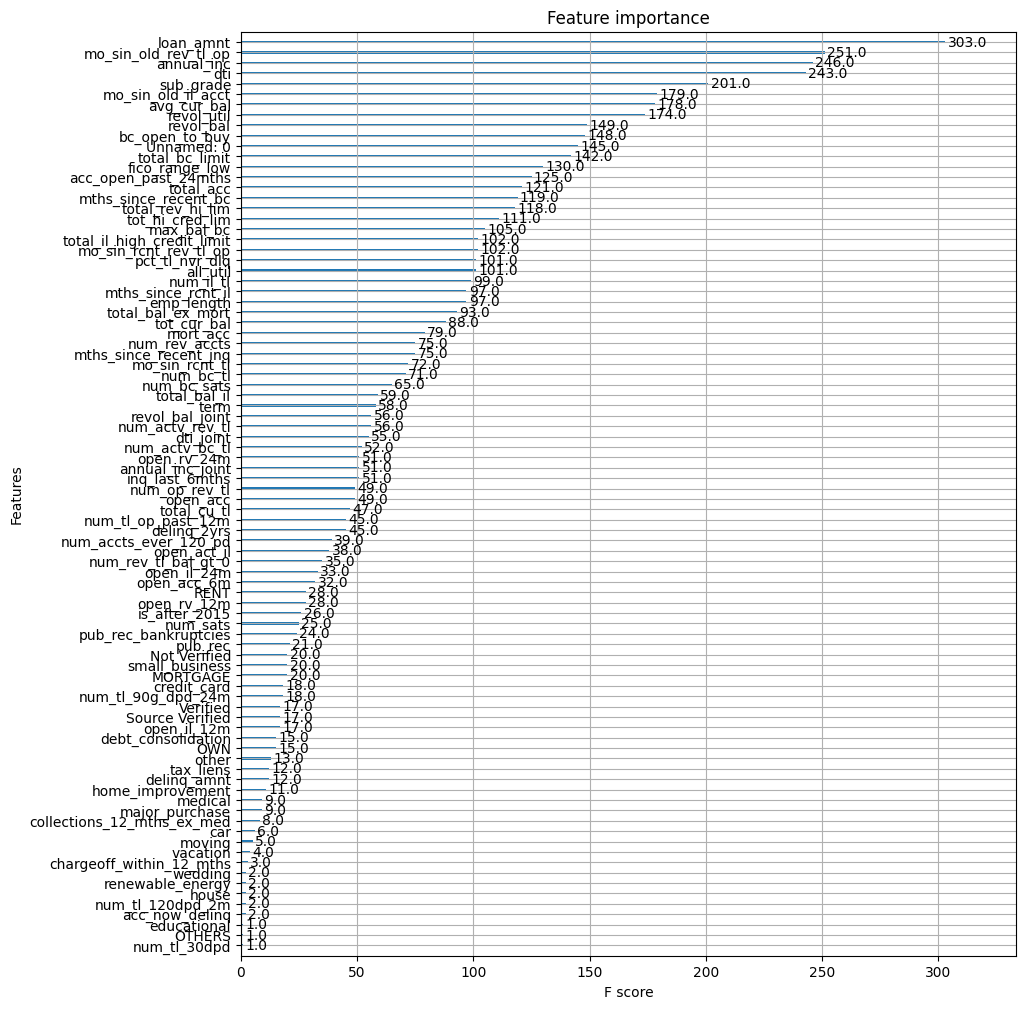

In [7]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)